In [ ]:
# import libraries and dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")
df = pd.read_csv("Train_Test_Network (6).csv")
df.head()

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,...,0,0,-,-,-,bad_UDP_checksum,-,F,0,normal


In [ ]:
#type('date')

In [ ]:
#type('time')

In [ ]:
#df['date'] = pd.to_datetime(df['date'])
#print(df)

In [ ]:
#Transform string to date
#df['date'] = pd.to_datetime(df.date, format="%d-%m-%Y")

In [ ]:
#Extracting Year
#df['year'] = df['date'].dt.year

#Extracting Month
#df['month'] = df['date'].dt.month

#Extracting the weekday name of the date
#df['day_name'] = df['date'].dt.day_name()

In [ ]:
# dealing with attribute time
#new data frame with split value columns
#new = df['time'].str.split(':',n=2,expand=True)

In [ ]:
# making separate first name column from new data frame
#df["hour"]= new[0]
#df["min"]= new[1]
#df["sec"]= new[2]

In [ ]:
#df

In [ ]:
# address missing value
df.isnull().sum()
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values
missing_percentage = round(missing_count / value_count * 100, 1) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

                        count  percentage
ts                          0         0.0
src_ip                      0         0.0
src_port                    0         0.0
dst_ip                      0         0.0
dst_port                    0         0.0
proto                       0         0.0
service                     0         0.0
duration                    0         0.0
src_bytes                   0         0.0
dst_bytes                   0         0.0
conn_state                  0         0.0
missed_bytes                0         0.0
src_pkts                    0         0.0
src_ip_bytes                0         0.0
dst_pkts                    0         0.0
dst_ip_bytes                0         0.0
dns_query                   0         0.0
dns_qclass                  0         0.0
dns_qtype                   0         0.0
dns_rcode                   0         0.0
dns_AA                      0         0.0
dns_RD                      0         0.0
dns_RA                      0     

In [ ]:
# calculate duplicates 
dups = df.duplicated() 
# report if there are any duplicates 
print(dups.any()) 
# list all duplicate rows 
print(df[dups])
print(df.shape) 
# delete duplicate rows 
df.drop_duplicates(inplace=True) 
print(df.shape)

True
                ts         src_ip  src_port         dst_ip  dst_port proto  \
12679   1554220499  192.168.1.250      5353    224.0.0.251      5353   udp   
12699   1554220514  192.168.1.133      5353    224.0.0.251      5353   udp   
12813   1554220595  192.168.1.133      5353    224.0.0.251      5353   udp   
12996   1554220744   192.168.1.79     43029  192.168.1.255     15600   udp   
13124   1554220864  192.168.1.195       138  192.168.1.255       138   udp   
...            ...            ...       ...            ...       ...   ...   
420021  1556423639  192.168.1.195     49884    13.107.4.50        80   tcp   
420022  1556423639  192.168.1.195     49885    13.107.4.50        80   tcp   
420023  1556423639  192.168.1.195     49884    13.107.4.50        80   tcp   
420024  1556423639  192.168.1.195     49885    13.107.4.50        80   tcp   
420025  1556423639  192.168.1.195     49884    13.107.4.50        80   tcp   

       service  duration  src_bytes  dst_bytes  ... http_r

In [ ]:
df['src_ip'].value_counts()

192.168.1.190     77025
192.168.1.152     67775
192.168.1.30      61637
192.168.1.79      36060
192.168.1.195     33368
                  ...  
255.42.60.52          1
243.111.49.216        1
10.3.191.169          1
74.166.95.98          1
118.164.23.26         1
Name: src_ip, Length: 11536, dtype: int64

In [ ]:
df['src_port'].value_counts()

1880     18631
43530    17313
42100    16688
34296    15967
53972     8354
         ...  
10703        1
27406        1
29988        1
12458        1
44197        1
Name: src_port, Length: 53671, dtype: int64

In [ ]:
df['dst_ip'].value_counts()

192.168.1.190    80097
192.168.1.152    60860
192.168.1.193    22835
192.168.1.195    22595
127.0.0.1        20143
                 ...  
200.62.191.10        1
192.195.66.12        1
85.90.64.164         1
202.3.54.32          1
104.98.29.100        1
Name: dst_ip, Length: 5268, dtype: int64

In [ ]:
df['dst_port'].value_counts()

53       107741
80        82430
7878      33984
15600     29682
10502     24318
          ...  
57626         1
53416         1
53409         1
53425         1
42152         1
Name: dst_port, Length: 2666, dtype: int64

In [ ]:
df['proto'].value_counts()

tcp     276912
udp     167285
icmp      5775
Name: proto, dtype: int64

In [ ]:
df['service'].value_counts()

-             269985
dns           115640
http           60720
ssl             2070
ftp             1065
gssapi           184
dce_rpc          136
smb              108
dhcp              46
smb;gssapi        18
Name: service, dtype: int64

In [ ]:
df['duration'].value_counts()

0.000000     194951
0.000018       1482
0.000017       1390
0.000004       1349
0.000016       1139
              ...  
60.565782         1
60.296862         1
60.614134         1
60.388352         1
22.872314         1
Name: duration, Length: 124727, dtype: int64

In [ ]:
df['src_bytes'].value_counts()

0         282081
130        13625
48          6620
132         5483
155         5476
           ...  
739            1
796            1
1949           1
1971           1
101568         1
Name: src_bytes, Length: 3056, dtype: int64

In [ ]:
df['dst_bytes'].value_counts()

0         296458
298         8284
3440        4915
12183       4795
1919        4398
           ...  
1638           1
4409           1
22586          1
2236           1
749633         1
Name: dst_bytes, Length: 3511, dtype: int64

In [ ]:
df['conn_state'].value_counts()

SF        123512
S0        107695
OTH       106603
REJ        45036
SHR        22051
SH         18111
S1         13843
S3          6642
RSTR        2360
RSTRH       1724
RSTO        1518
S2           708
RSTOS0       169
Name: conn_state, dtype: int64

In [ ]:
df['missed_bytes'].value_counts()

0       446363
1         1218
1920       201
3441       183
2327        77
         ...  
359          1
295          1
222          1
527          1
1440         1
Name: missed_bytes, Length: 929, dtype: int64

In [ ]:
df['src_pkts'].value_counts()

1        208297
0        109447
2         40133
5         38815
6         14619
          ...  
34330         1
46162         1
2828          1
761           1
4015          1
Name: src_pkts, Length: 414, dtype: int64

In [ ]:
df['src_ip_bytes'].value_counts()

0         109447
63         30271
40         27480
48         19611
44         18507
           ...  
4539           1
1731           1
12500          1
2522           1
108064         1
Name: src_ip_bytes, Length: 4549, dtype: int64

In [ ]:
df['dst_pkts'].value_counts()

0       225307
1       126349
2        23239
5        16992
6        13589
         ...  
201          1
307          1
2028         1
1729         1
1923         1
Name: dst_pkts, Length: 332, dtype: int64

In [ ]:
df['missed_bytes'].value_counts()

0       446363
1         1218
1920       201
3441       183
2327        77
         ...  
359          1
295          1
222          1
527          1
1440         1
Name: missed_bytes, Length: 929, dtype: int64

In [ ]:
df['missed_bytes'].value_counts()

0       446363
1         1218
1920       201
3441       183
2327        77
         ...  
359          1
295          1
222          1
527          1
1440         1
Name: missed_bytes, Length: 929, dtype: int64

In [ ]:
df['weird_name'].value_counts()

-                                   448678
DNS_RR_unknown_type                    753
active_connection_reuse                275
data_before_established                109
bad_UDP_checksum                        68
bad_TCP_checksum                        52
connection_originator_SYN_ack           20
above_hole_data_without_any_acks         6
inappropriate_FIN                        3
dnp3_corrupt_header_checksum             3
possible_split_routing                   3
TCP_ack_underflow_or_misorder            2
Name: weird_name, dtype: int64

In [ ]:
df['weird_addl'].value_counts()

-     449219
46       707
48        38
43         8
Name: weird_addl, dtype: int64

In [ ]:
df['weird_notice'].value_counts()

-    448678
F      1294
Name: weird_notice, dtype: int64

In [ ]:
df['http_resp_mime_types'].value_counts()

-                                    449812
application/xml                          63
text/html                                41
image/png                                15
application/vnd.ms-cab-compressed        13
text/plain                               11
application/ocsp-response                 8
text/json                                 4
image/jpeg                                4
application/x-debian-package              1
Name: http_resp_mime_types, dtype: int64

In [ ]:
df['http_orig_mime_types'].value_counts()

-                       449958
application/xml              8
application/soap+xml         6
Name: http_orig_mime_types, dtype: int64

In [ ]:
df['http_status_code'].value_counts()



0      449730
200       160
206        53
302        13
404        11
304         2
403         2
101         1
Name: http_status_code, dtype: int64

In [ ]:
df['http_user_agent'].value_counts()

-                                                                                                                                    449738
Microsoft-Delivery-Optimization/10.0                                                                                                     57
Microsoft-Windows/10.0 UPnP/1.0                                                                                                          32
Ruby                                                                                                                                     31
DAFUPnP                                                                                                                                  19
User-Agent: Microsoft-DLNA DLNADOC/1.50                                                                                                  19
Windows-Update-Agent/10.0.10011.16384 Client-Protocol/1.91                                                                               11
MICROSOFT_DEVICE_MET

In [ ]:
df['http_version'].value_counts()

-      449730
1.1       242
Name: http_version, dtype: int64

In [ ]:
df['http_uri'].value_counts()

-                                                                                                                                                                                         449738
/no_nonce_string/                                                                                                                                                                             15
/dvwa/login.php-r                                                                                                                                                                             13
/no_nonce_string/ContentDirectory/scpd.xml                                                                                                                                                    12
/filestreamingservice/files/1f41d40e-6e49-42f0-a4dc-3d35029e2a5d?P1=1554315773&P2=402&P3=2&P4=D2MtshBIyXICLz+f8ls5Sa4mWcxA1B670oj1WRainhnd91v77n9XO6/xoc4QeEYZdwdKSG+6cFNvkBVYbJdXpw==         9
                                   

In [ ]:
df['http_method'].value_counts()

-       449738
GET        215
POST        15
HEAD         4
Name: http_method, dtype: int64

In [ ]:
df['http_trans_depth'].value_counts()

-     449725
1        214
2         25
10         1
3          1
4          1
5          1
6          1
7          1
8          1
9          1
Name: http_trans_depth, dtype: int64

In [ ]:
df['ssl_version'].value_counts()

-         449666
TLSv12       188
TLSv13       116
TLSv10         2
Name: ssl_version, dtype: int64

In [ ]:
df['ssl_cipher'].value_counts()

-                                          449666
TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256         176
TLS_AES_128_GCM_SHA256                        116
TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384          11
TLS_ECDHE_RSA_WITH_AES_256_CBC_SHA              2
TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256         1
Name: ssl_cipher, dtype: int64

In [ ]:
df['ssl_resumed'].value_counts()

-    449281
F       605
T        86
Name: ssl_resumed, dtype: int64

In [ ]:
df['ssl_established'].value_counts()

-    449281
F       596
T        95
Name: ssl_established, dtype: int64

In [ ]:
df['ssl_subject'].value_counts()

-                                                                                           449963
CN=*.wns.windows.com                                                                             4
CN=Mr Shepherd;OU=Security Shepherd Project;O=OWASP;L=Dublin;ST=Ireland;C=IE                     2
CN=settings-win.data.microsoft.com;OU=WSE;O=Microsoft;L=Redmond;ST=WA;C=US                       1
CN=sls.update.microsoft.com;OU=DSP;O=Microsoft;L=Redmond;ST=WA;C=US                              1
CN=*.events.data.microsoft.com;OU=Microsoft;O=Microsoft Corporation;L=Redmond;ST=WA;C=US         1
Name: ssl_subject, dtype: int64

In [ ]:
df['ssl_issuer'].value_counts()



-                                                                                                449963
CN=Microsoft IT TLS CA 5;OU=Microsoft IT;O=Microsoft Corporation;L=Redmond;ST=Washington;C=US         4
CN=Microsoft Secure Server CA 2011;O=Microsoft Corporation;L=Redmond;ST=Washington;C=US               2
CN=Mr Shepherd;OU=Security Shepherd Project;O=OWASP;L=Dublin;ST=Ireland;C=IE                          2
CN=Microsoft Update Secure Server CA 2.1;O=Microsoft Corporation;L=Redmond;ST=Washington;C=US         1
Name: ssl_issuer, dtype: int64

In [ ]:
df['dns_query'].value_counts()


-                                                  355529
a2z3kk2ebqzso7.iot.ap-southeast-2.amazonaws.com     13700
arpa.whois-servers.net                               2198
_sleep-proxy._udp.local                              2115
testphp.vulnweb.com                                  1848
                                                    ...  
94.157.81.140.in-addr.arpa                              1
125.48.34.73.in-addr.arpa                               1
101.192.178.247.in-addr.arpa                            1
254.68.212.in-addr.arpa                                 1
loadm.exelator.com                                      1
Name: dns_query, Length: 14149, dtype: int64

In [ ]:
df['dns_qclass'].value_counts()


0        355887
1         92119
32769      1966
Name: dns_qclass, dtype: int64

In [ ]:
df['dns_qtype'].value_counts()


0      355887
1       36080
12      21353
28      20282
43       9061
255      5081
2        1284
48        667
32        209
33         59
6           6
16          3
Name: dns_qtype, dtype: int64

In [ ]:
df['dns_rcode'].value_counts()


0    437706
3     10510
5      1187
2       565
1         4
Name: dns_rcode, dtype: int64

In [ ]:
df['dns_AA'].value_counts()

-    354668
F     80698
T     14606
Name: dns_AA, dtype: int64

In [ ]:
df['dns_RD'].value_counts()

-    354668
F     62526
T     32778
Name: dns_RD, dtype: int64

In [ ]:
df['dns_RA'].value_counts()

-    354668
F     85416
T      9888
Name: dns_RA, dtype: int64

In [ ]:
df['dns_rejected'].value_counts()

-    354668
F     88811
T      6493
Name: dns_rejected, dtype: int64

In [ ]:
# drop columns 
df = df.drop(['ts', 'label'], axis=1)

In [ ]:
df

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,type
0,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,OTH,...,0,0,0,-,-,-,bad_TCP_checksum,-,F,normal
1,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,S0,...,0,0,0,-,-,-,-,-,-,normal
2,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,OTH,...,0,0,0,-,-,-,bad_TCP_checksum,-,F,normal
3,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,OTH,...,0,0,0,-,-,-,-,-,-,normal
4,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,SHR,...,0,0,0,-,-,-,bad_UDP_checksum,-,F,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461038,192.168.1.32,33108,176.28.50.165,80,tcp,-,0.000000,0,0,S0,...,0,0,0,-,-,-,-,-,-,xss
461039,192.168.1.33,37242,34.230.157.88,443,tcp,-,0.000000,0,0,OTH,...,0,0,0,-,-,-,-,-,-,ransomware
461040,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,...,0,0,0,-,-,-,-,-,-,backdoor
461041,192.168.1.31,60816,104.98.29.100,443,tcp,-,23.190902,32,31,SF,...,0,0,0,-,-,-,-,-,-,mitm


In [ ]:
# transform hour to int
#df['hour'] = df['hour'].astype(int)

In [ ]:
#type('hour')

In [ ]:
# transform int to string
# df['label'] = df['label'].astype(str)

In [ ]:
#df['thermostat_status'] = df['thermostat_status'].astype(str)

In [ ]:
# populate the numerical and categorical variables
num_list = []
cat_list = []
for column in df:
   if column != 'label': # separate lable
       if is_numeric_dtype(df[column]):
           num_list.append(column)
       elif is_string_dtype(df[column]):
           cat_list.append(column)

In [ ]:
num_list


['src_port',
 'dst_port',
 'duration',
 'src_bytes',
 'dst_bytes',
 'missed_bytes',
 'src_pkts',
 'src_ip_bytes',
 'dst_pkts',
 'dst_ip_bytes',
 'dns_qclass',
 'dns_qtype',
 'dns_rcode',
 'http_request_body_len',
 'http_response_body_len',
 'http_status_code']

In [ ]:
cat_list

['src_ip',
 'dst_ip',
 'proto',
 'service',
 'conn_state',
 'dns_query',
 'dns_AA',
 'dns_RD',
 'dns_RA',
 'dns_rejected',
 'ssl_version',
 'ssl_cipher',
 'ssl_resumed',
 'ssl_established',
 'ssl_subject',
 'ssl_issuer',
 'http_trans_depth',
 'http_method',
 'http_uri',
 'http_version',
 'http_user_agent',
 'http_orig_mime_types',
 'http_resp_mime_types',
 'weird_name',
 'weird_addl',
 'weird_notice',
 'type']

In [ ]:
### 2. Feature Engineering and EDA  ###

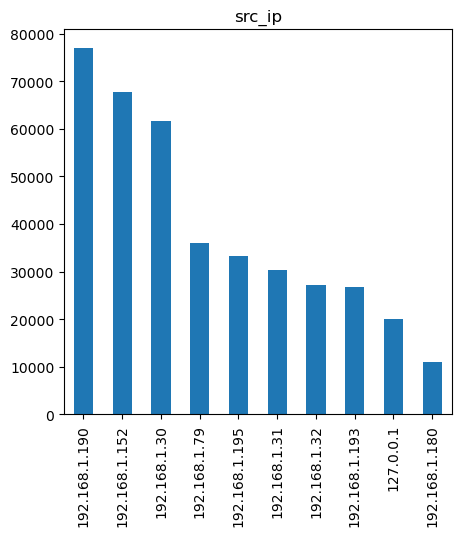

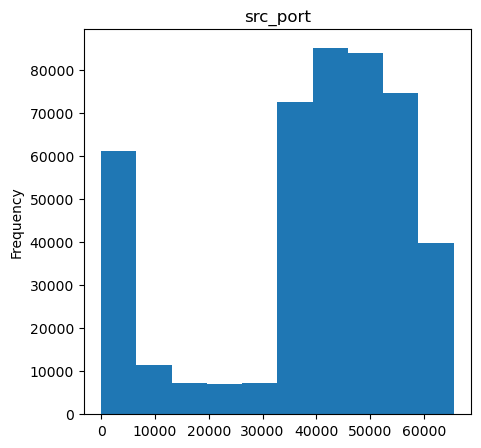

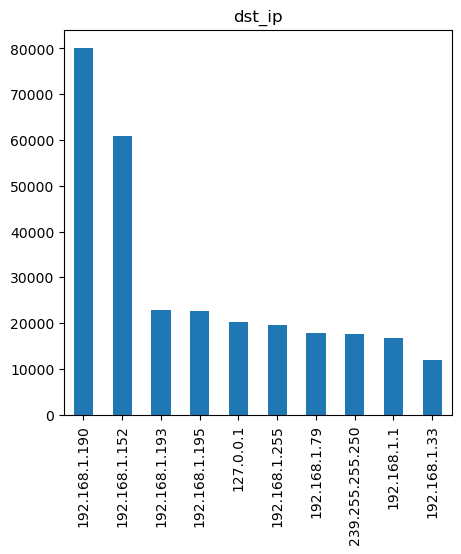

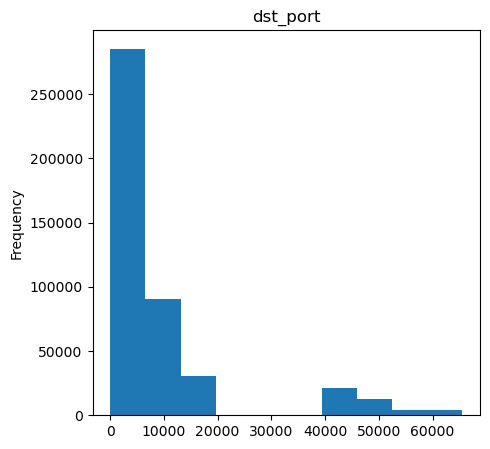

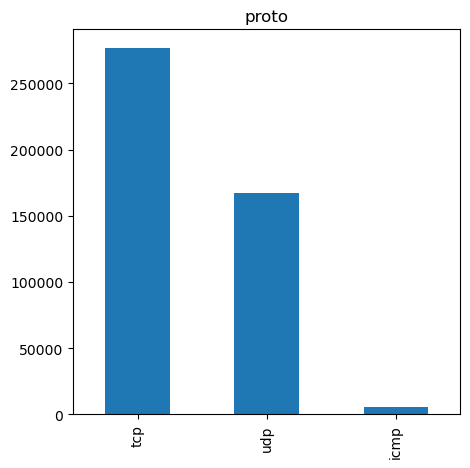

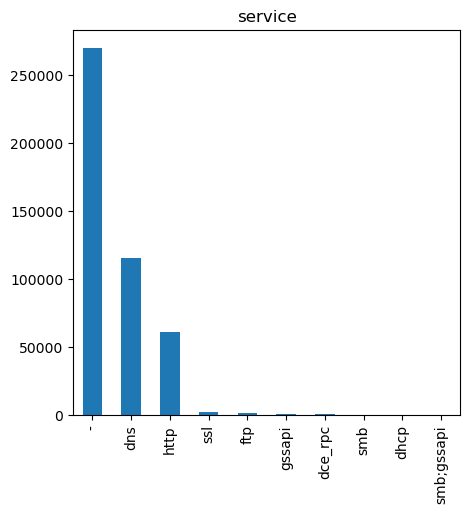

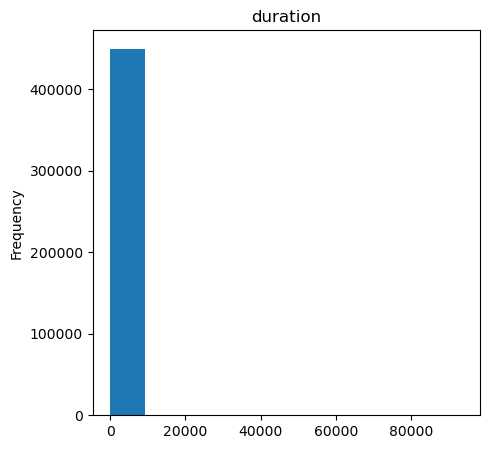

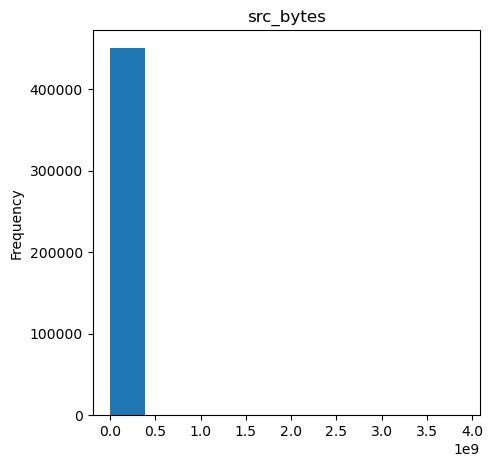

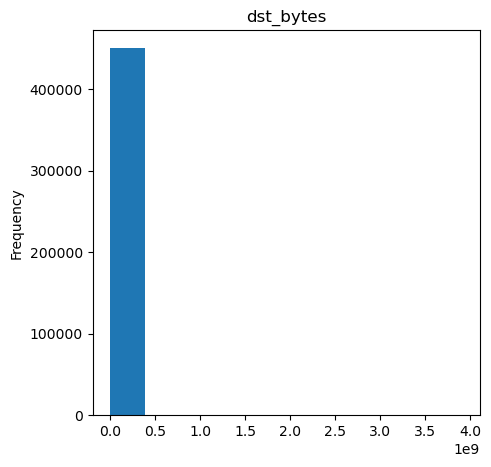

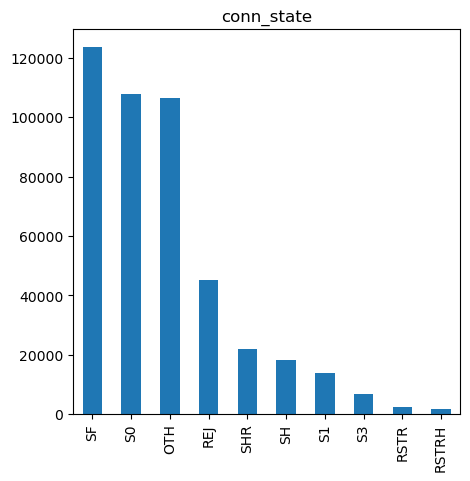

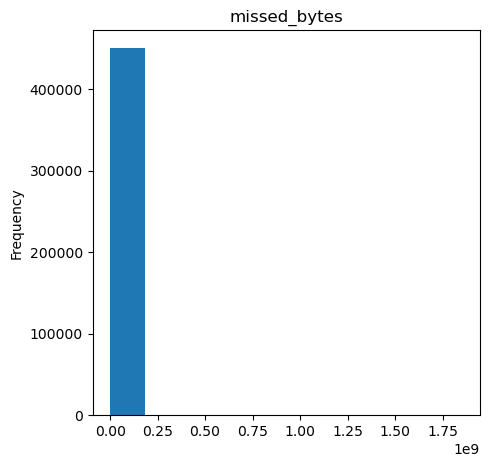

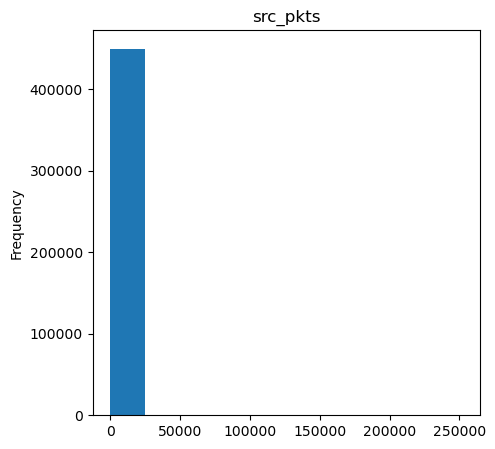

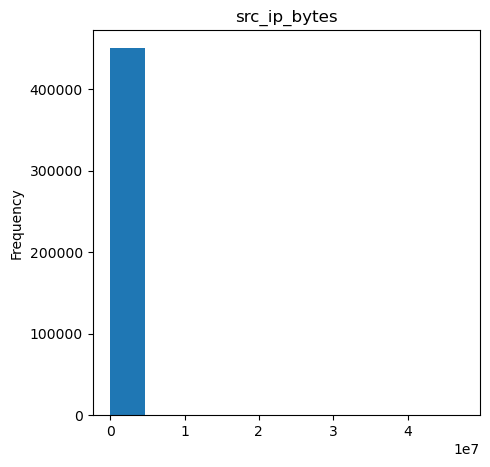

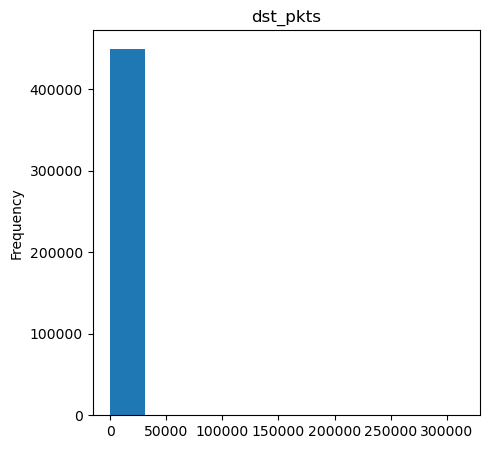

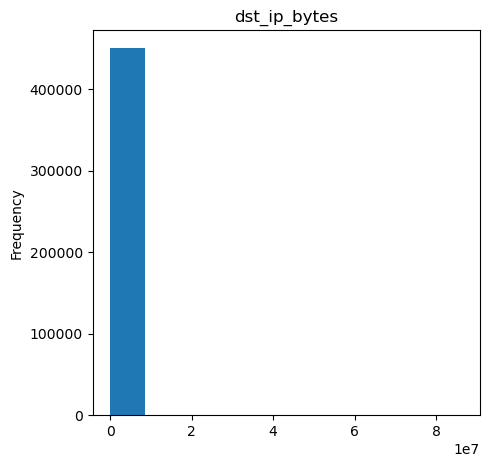

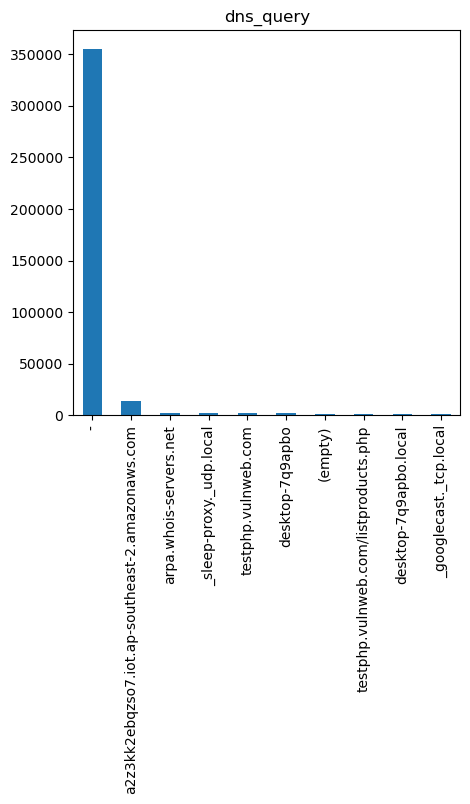

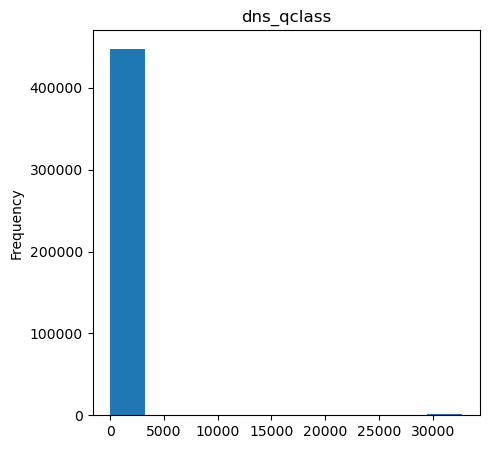

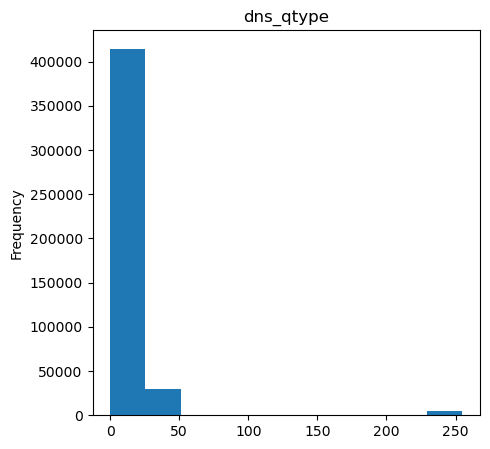

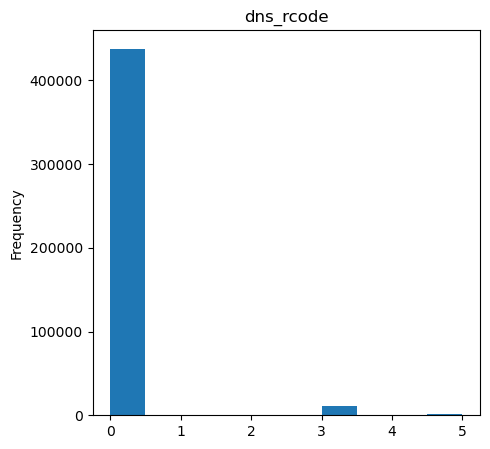

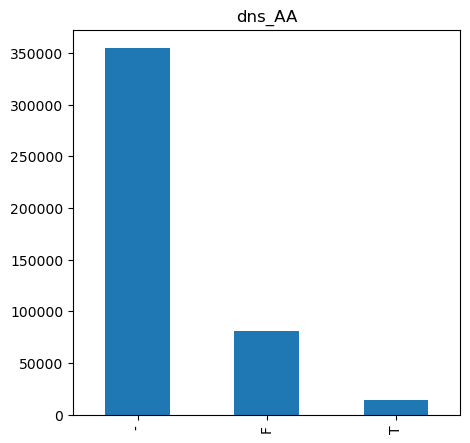

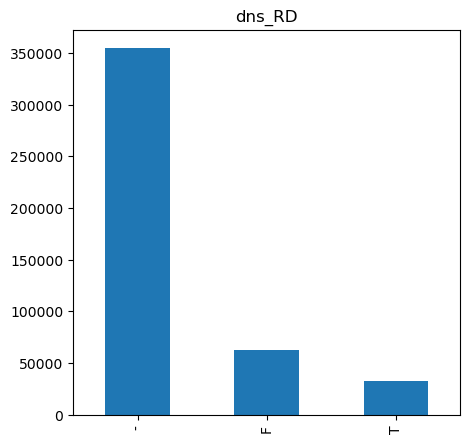

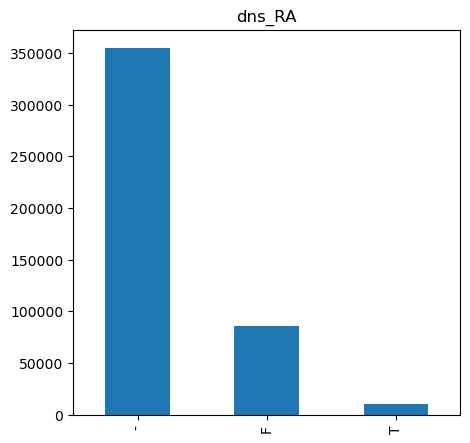

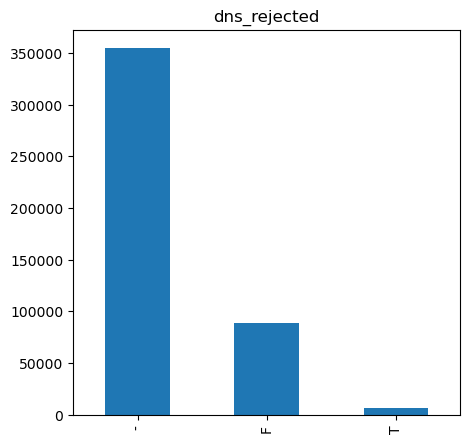

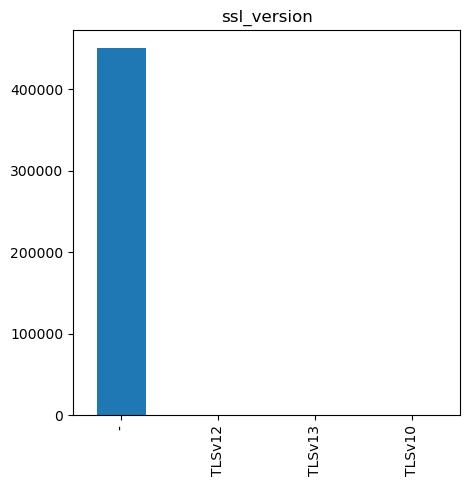

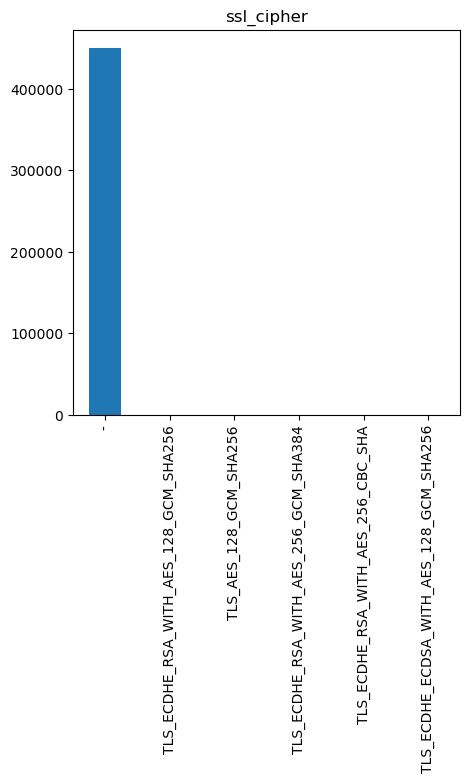

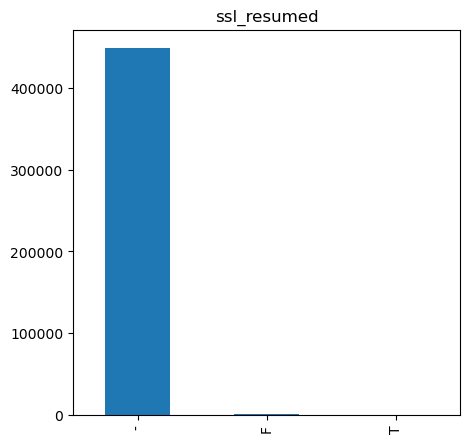

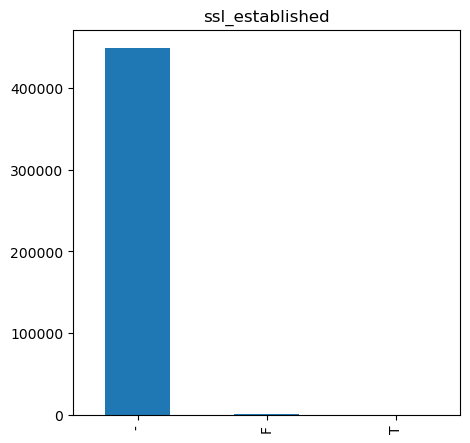

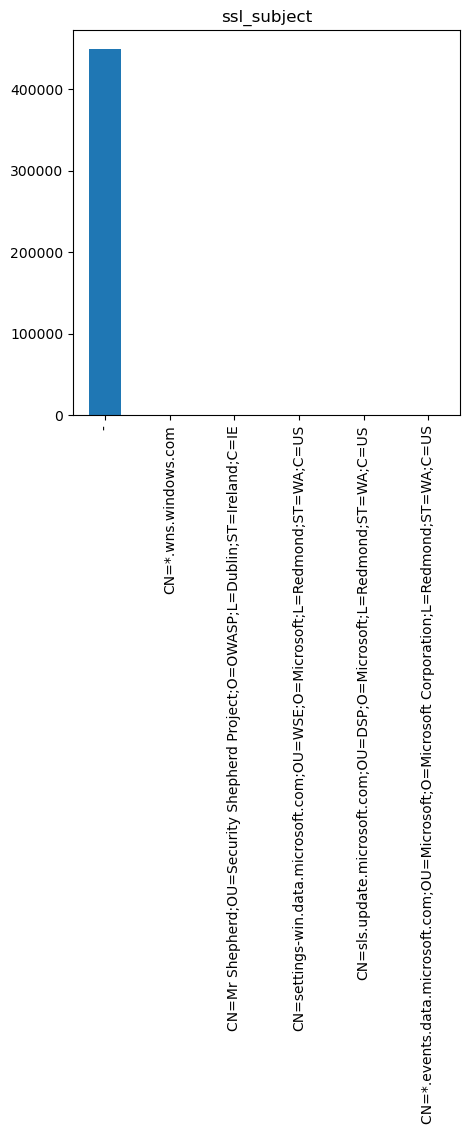

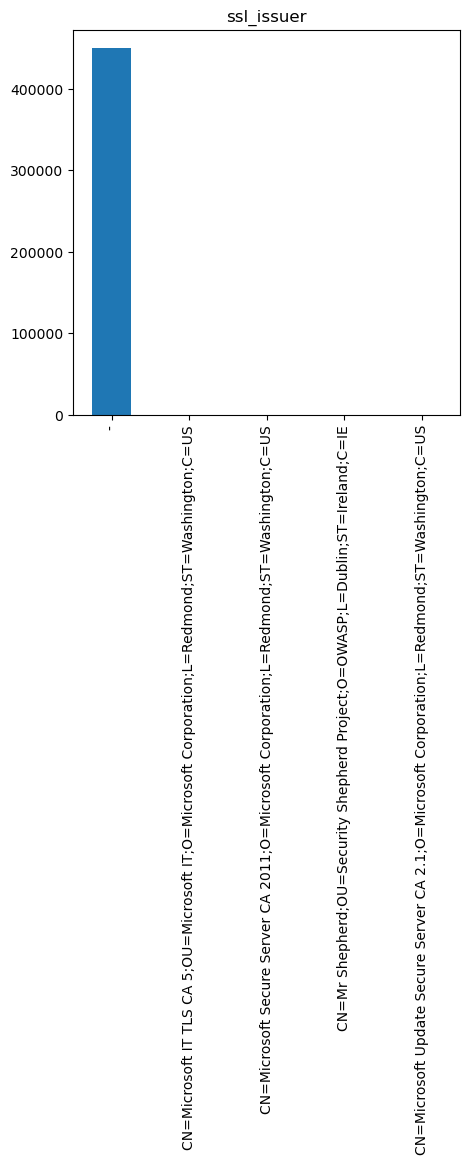

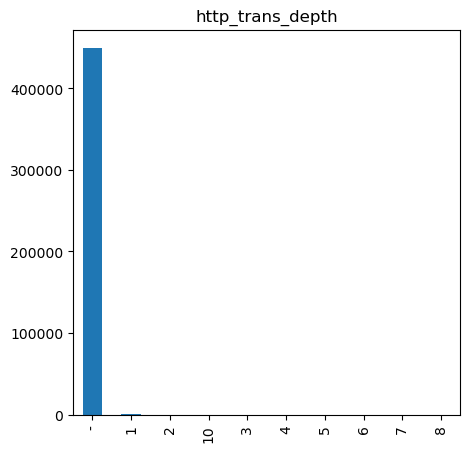

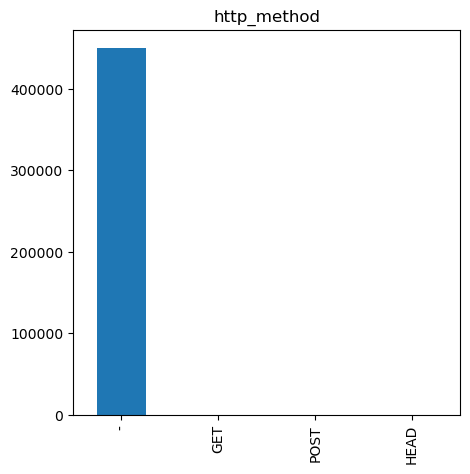

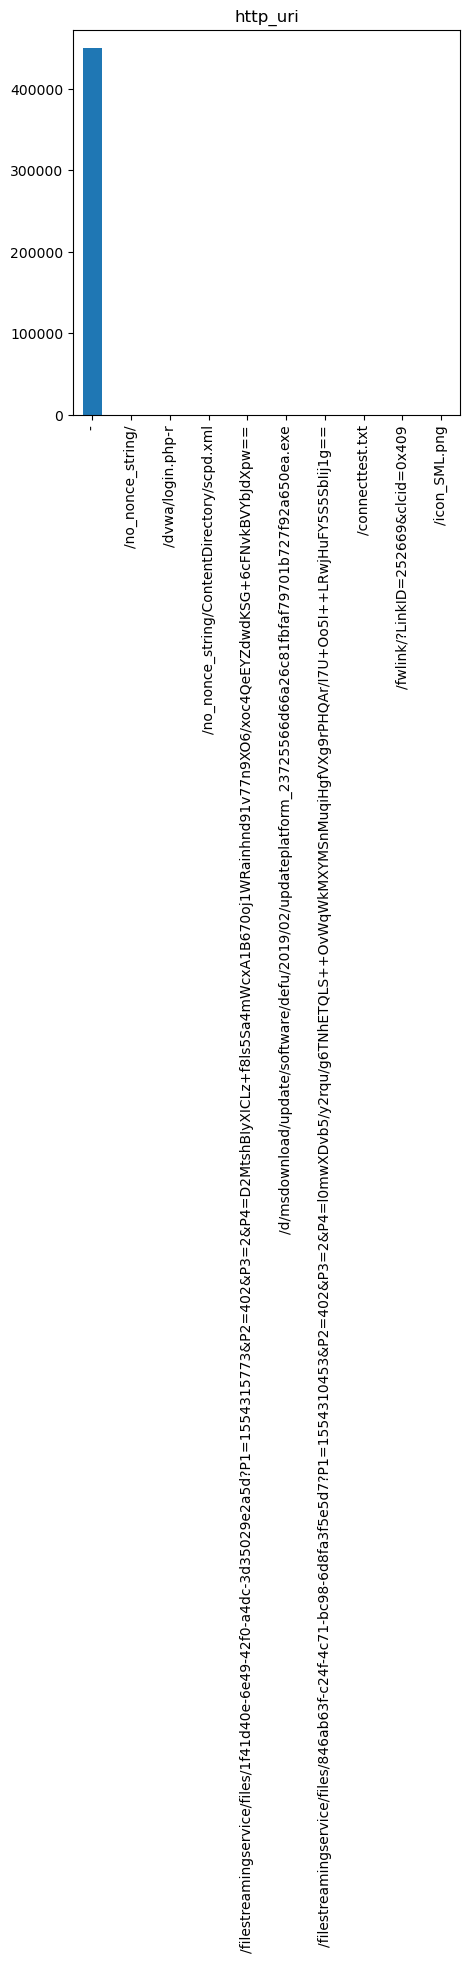

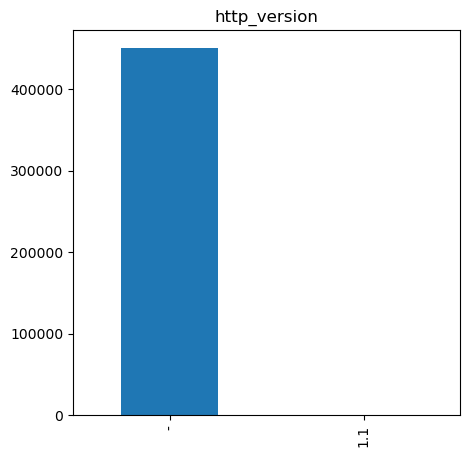

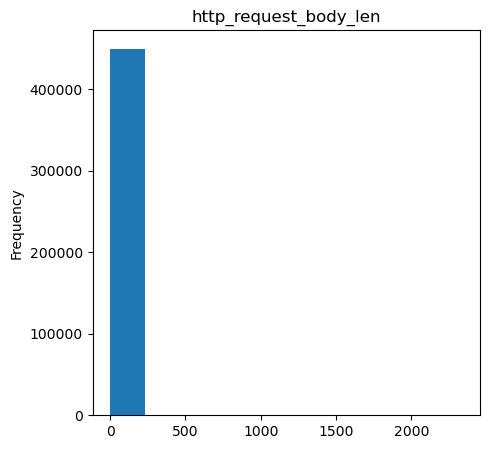

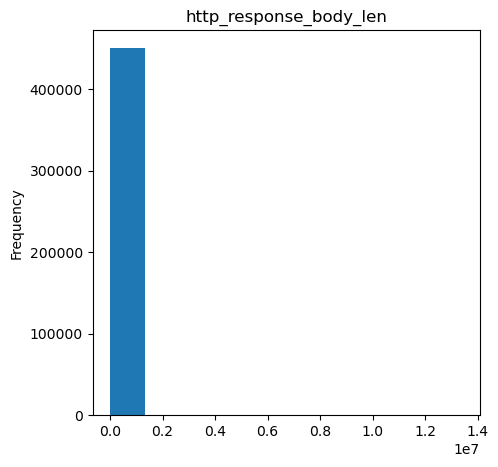

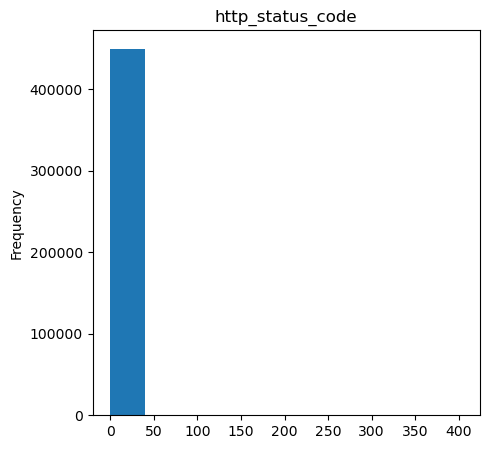

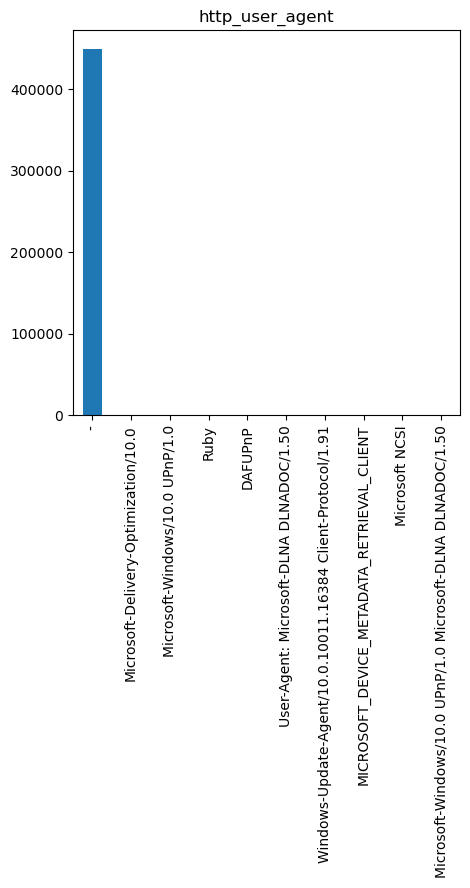

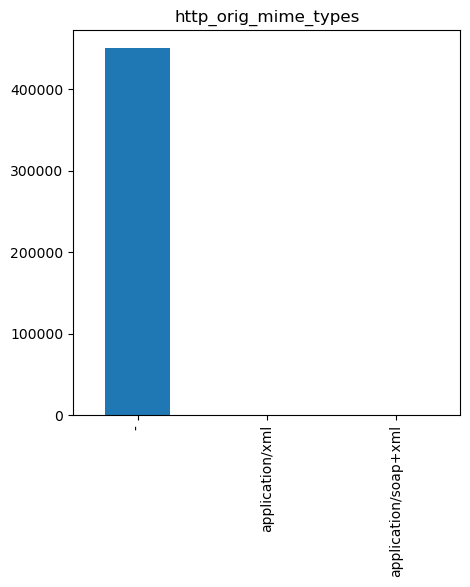

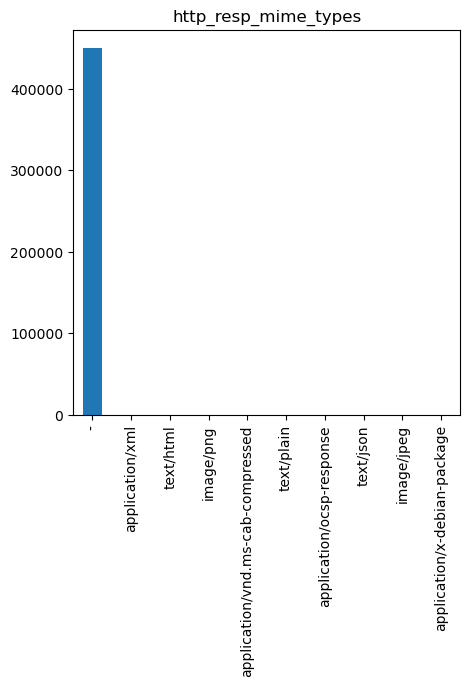

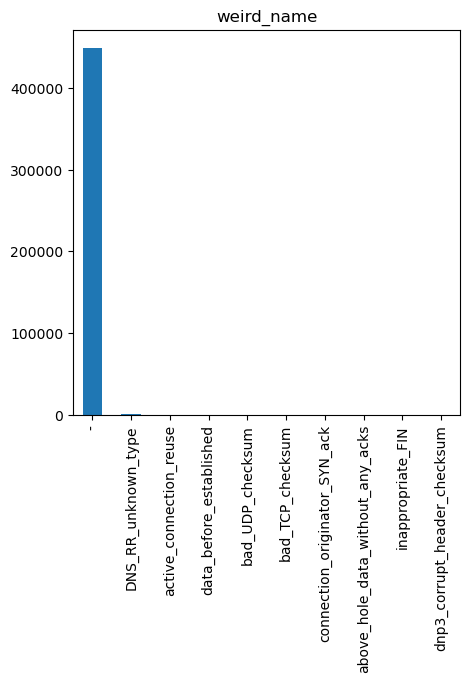

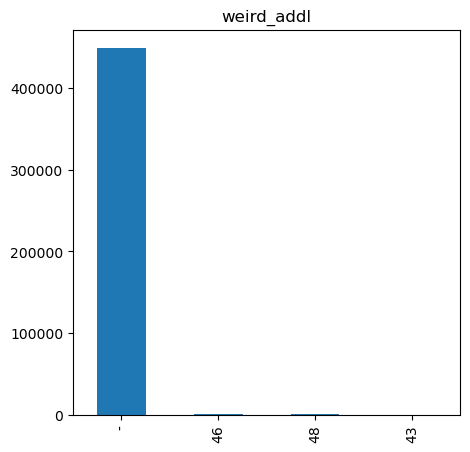

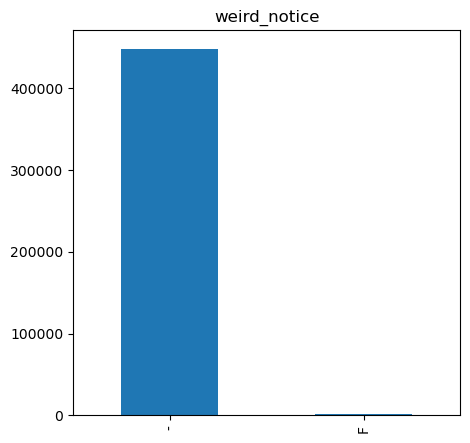

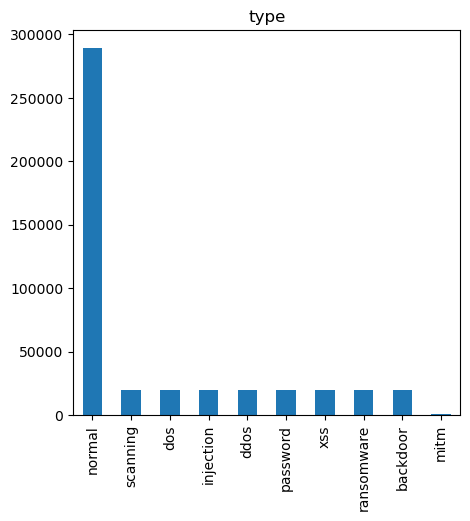

In [ ]:
# univariate analysis
for column in df:
   plt.figure(column, figsize = (5,5))
   plt.title(column)
   if is_numeric_dtype(df[column]):
       df[column].plot(kind = 'hist')
   elif is_string_dtype(df[column]):
       df[column].value_counts()[:10].plot(kind = 'bar')


In [ ]:
import category_encoders as ce
encoder= ce.BinaryEncoder(cols=['src_ip','src_port','dst_ip','dst_port','dns_query','proto','service','conn_state','dns_qclass','dns_rejected','dns_RA','dns_RD','dns_AA','dns_rcode','dns_qtype','ssl_version','ssl_cipher','ssl_resumed','ssl_established','ssl_subject','ssl_issuer','weird_name','weird_addl','weird_notice','http_trans_depth','http_method','http_uri','http_version','http_resp_mime_types','http_orig_mime_types','http_user_agent','http_status_code'],return_df=True)

In [ ]:
df=encoder.fit_transform(df) 

In [ ]:
list(df.columns)

['src_ip_0',
 'src_ip_1',
 'src_ip_2',
 'src_ip_3',
 'src_ip_4',
 'src_ip_5',
 'src_ip_6',
 'src_ip_7',
 'src_ip_8',
 'src_ip_9',
 'src_ip_10',
 'src_ip_11',
 'src_ip_12',
 'src_ip_13',
 'src_port_0',
 'src_port_1',
 'src_port_2',
 'src_port_3',
 'src_port_4',
 'src_port_5',
 'src_port_6',
 'src_port_7',
 'src_port_8',
 'src_port_9',
 'src_port_10',
 'src_port_11',
 'src_port_12',
 'src_port_13',
 'src_port_14',
 'src_port_15',
 'dst_ip_0',
 'dst_ip_1',
 'dst_ip_2',
 'dst_ip_3',
 'dst_ip_4',
 'dst_ip_5',
 'dst_ip_6',
 'dst_ip_7',
 'dst_ip_8',
 'dst_ip_9',
 'dst_ip_10',
 'dst_ip_11',
 'dst_ip_12',
 'dst_port_0',
 'dst_port_1',
 'dst_port_2',
 'dst_port_3',
 'dst_port_4',
 'dst_port_5',
 'dst_port_6',
 'dst_port_7',
 'dst_port_8',
 'dst_port_9',
 'dst_port_10',
 'dst_port_11',
 'proto_0',
 'proto_1',
 'service_0',
 'service_1',
 'service_2',
 'service_3',
 'duration',
 'src_bytes',
 'dst_bytes',
 'conn_state_0',
 'conn_state_1',
 'conn_state_2',
 'conn_state_3',
 'missed_bytes',
 'src_pk

In [ ]:
df

,src_ip_0,src_ip_1,src_ip_2,src_ip_3,src_ip_4,src_ip_5,src_ip_6,src_ip_7,src_ip_8,src_ip_9,...,weird_name_0,weird_name_1,weird_name_2,weird_name_3,weird_addl_0,weird_addl_1,weird_addl_2,weird_notice_0,weird_notice_1,type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,normal
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,normal
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,normal
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,normal
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461038,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,xss
461039,1,0,1,1,0,0,1,1,1,0,...,0,0,1,0,0,0,1,1,0,ransomware
461040,1,0,1,1,0,0,1,1,1,1,...,0,0,1,0,0,0,1,1,0,backdoor
461041,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,mitm


In [ ]:
list(df.columns)

['src_ip_0',
 'src_ip_1',
 'src_ip_2',
 'src_ip_3',
 'src_ip_4',
 'src_ip_5',
 'src_ip_6',
 'src_ip_7',
 'src_ip_8',
 'src_ip_9',
 'src_ip_10',
 'src_ip_11',
 'src_ip_12',
 'src_ip_13',
 'src_port_0',
 'src_port_1',
 'src_port_2',
 'src_port_3',
 'src_port_4',
 'src_port_5',
 'src_port_6',
 'src_port_7',
 'src_port_8',
 'src_port_9',
 'src_port_10',
 'src_port_11',
 'src_port_12',
 'src_port_13',
 'src_port_14',
 'src_port_15',
 'dst_ip_0',
 'dst_ip_1',
 'dst_ip_2',
 'dst_ip_3',
 'dst_ip_4',
 'dst_ip_5',
 'dst_ip_6',
 'dst_ip_7',
 'dst_ip_8',
 'dst_ip_9',
 'dst_ip_10',
 'dst_ip_11',
 'dst_ip_12',
 'dst_port_0',
 'dst_port_1',
 'dst_port_2',
 'dst_port_3',
 'dst_port_4',
 'dst_port_5',
 'dst_port_6',
 'dst_port_7',
 'dst_port_8',
 'dst_port_9',
 'dst_port_10',
 'dst_port_11',
 'proto_0',
 'proto_1',
 'service_0',
 'service_1',
 'service_2',
 'service_3',
 'duration',
 'src_bytes',
 'dst_bytes',
 'conn_state_0',
 'conn_state_1',
 'conn_state_2',
 'conn_state_3',
 'missed_bytes',
 'src_pk

In [ ]:
df

,src_ip_0,src_ip_1,src_ip_2,src_ip_3,src_ip_4,src_ip_5,src_ip_6,src_ip_7,src_ip_8,src_ip_9,...,weird_name_0,weird_name_1,weird_name_2,weird_name_3,weird_addl_0,weird_addl_1,weird_addl_2,weird_notice_0,weird_notice_1,type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,normal
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,normal
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,normal
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,normal
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461038,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,xss
461039,1,0,1,1,0,0,1,1,1,0,...,0,0,1,0,0,0,1,1,0,ransomware
461040,1,0,1,1,0,0,1,1,1,1,...,0,0,1,0,0,0,1,1,0,backdoor
461041,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,mitm


In [ ]:
df=df[[ 'http_request_body_len',
 'http_response_body_len','duration',
 'src_bytes',
 'dst_bytes','src_ip_0','missed_bytes',
 'src_pkts',
 'src_ip_bytes',
 'dst_pkts',
 'dst_ip_bytes',
 'src_ip_1',
 'src_ip_2',
 'src_ip_3',
 'src_ip_4',
 'src_ip_5',
 'src_ip_6',
 'src_ip_7',
 'src_ip_8',
 'src_ip_9',
 'src_ip_10',
 'src_ip_11',
 'src_ip_12',
 'src_ip_13',
 'src_port_0',
 'src_port_1',
 'src_port_2',
 'src_port_3',
 'src_port_4',
 'src_port_5',
 'src_port_6',
 'src_port_7',
 'src_port_8',
 'src_port_9',
 'src_port_10',
 'src_port_11',
 'src_port_12',
 'src_port_13',
 'src_port_14',
 'src_port_15',
 'dst_ip_0',
 'dst_ip_1',
 'dst_ip_2',
 'dst_ip_3',
 'dst_ip_4',
 'dst_ip_5',
 'dst_ip_6',
 'dst_ip_7',
 'dst_ip_8',
 'dst_ip_9',
 'dst_ip_10',
 'dst_ip_11',
 'dst_ip_12',
 'dst_port_0',
 'dst_port_1',
 'dst_port_2',
 'dst_port_3',
 'dst_port_4',
 'dst_port_5',
 'dst_port_6',
 'dst_port_7',
 'dst_port_8',
 'dst_port_9',
 'dst_port_10',
 'dst_port_11',
 'proto_0',
 'proto_1',
 'service_0',
 'service_1',
 'service_2',
 'service_3',
 'conn_state_0',
 'conn_state_1',
 'conn_state_2',
 'conn_state_3',
 'dns_query_0',
 'dns_query_1',
 'dns_query_2',
 'dns_query_3',
 'dns_query_4',
 'dns_query_5',
 'dns_query_6',
 'dns_query_7',
 'dns_query_8',
 'dns_query_9',
 'dns_query_10',
 'dns_query_11',
 'dns_query_12',
 'dns_query_13',
 'dns_qclass_0',
 'dns_qclass_1',
 'dns_qtype_0',
 'dns_qtype_1',
 'dns_qtype_2',
 'dns_qtype_3',
 'dns_rcode_0',
 'dns_rcode_1',
 'dns_rcode_2',
 'dns_AA_0',
 'dns_AA_1',
 'dns_RD_0',
 'dns_RD_1',
 'dns_RA_0',
 'dns_RA_1',
 'dns_rejected_0',
 'dns_rejected_1',
 'ssl_version_0',
 'ssl_version_1',
 'ssl_version_2',
 'ssl_cipher_0',
 'ssl_cipher_1',
 'ssl_cipher_2',
 'ssl_resumed_0',
 'ssl_resumed_1',
 'ssl_established_0',
 'ssl_established_1',
 'ssl_subject_0',
 'ssl_subject_1',
 'ssl_subject_2',
 'ssl_issuer_0',
 'ssl_issuer_1',
 'ssl_issuer_2',
 'http_trans_depth_0',
 'http_trans_depth_1',
 'http_trans_depth_2',
 'http_trans_depth_3',
 'http_method_0',
 'http_method_1',
 'http_method_2',
 'http_uri_0',
 'http_uri_1',
 'http_uri_2',
 'http_uri_3',
 'http_uri_4',
 'http_uri_5',
 'http_uri_6',
 'http_version_0',
 'http_version_1',
 'http_status_code_0',
 'http_status_code_1',
 'http_status_code_2',
 'http_status_code_3',
 'http_user_agent_0',
 'http_user_agent_1',
 'http_user_agent_2',
 'http_user_agent_3',
 'http_user_agent_4',
 'http_user_agent_5',
 'http_orig_mime_types_0',
 'http_orig_mime_types_1',
 'http_resp_mime_types_0',
 'http_resp_mime_types_1',
 'http_resp_mime_types_2',
 'http_resp_mime_types_3',
 'weird_name_0',
 'weird_name_1',
 'weird_name_2',
 'weird_name_3',
 'weird_addl_0',
 'weird_addl_1',
 'weird_addl_2',
 'weird_notice_0',
 'weird_notice_1',
 'type']]

In [ ]:
#numerical variables for scaling
n = df.iloc[:,:-153]

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(n)
robust_df = pd.DataFrame(robust_df, columns =['http_request_body_len',
 'http_response_body_len','duration',
 'src_bytes',
 'dst_bytes','src_ip_0','missed_bytes',
 'src_pkts',
 'src_ip_bytes',
 'dst_pkts',
 'dst_ip_bytes'])

In [ ]:
extracted_col= df[[ 'src_ip_1',
 'src_ip_2',
 'src_ip_3',
 'src_ip_4',
 'src_ip_5',
 'src_ip_6',
 'src_ip_7',
 'src_ip_8',
 'src_ip_9',
 'src_ip_10',
 'src_ip_11',
 'src_ip_12',
 'src_ip_13',
 'src_port_0',
 'src_port_1',
 'src_port_2',
 'src_port_3',
 'src_port_4',
 'src_port_5',
 'src_port_6',
 'src_port_7',
 'src_port_8',
 'src_port_9',
 'src_port_10',
 'src_port_11',
 'src_port_12',
 'src_port_13',
 'src_port_14',
 'src_port_15',
 'dst_ip_0',
 'dst_ip_1',
 'dst_ip_2',
 'dst_ip_3',
 'dst_ip_4',
 'dst_ip_5',
 'dst_ip_6',
 'dst_ip_7',
 'dst_ip_8',
 'dst_ip_9',
 'dst_ip_10',
 'dst_ip_11',
 'dst_ip_12',
 'dst_port_0',
 'dst_port_1',
 'dst_port_2',
 'dst_port_3',
 'dst_port_4',
 'dst_port_5',
 'dst_port_6',
 'dst_port_7',
 'dst_port_8',
 'dst_port_9',
 'dst_port_10',
 'dst_port_11',
 'proto_0',
 'proto_1',
 'service_0',
 'service_1',
 'service_2',
 'service_3',
 'conn_state_0',
 'conn_state_1',
 'conn_state_2',
 'conn_state_3',
 'dns_query_0',
 'dns_query_1',
 'dns_query_2',
 'dns_query_3',
 'dns_query_4',
 'dns_query_5',
 'dns_query_6',
 'dns_query_7',
 'dns_query_8',
 'dns_query_9',
 'dns_query_10',
 'dns_query_11',
 'dns_query_12',
 'dns_query_13',
 'dns_qclass_0',
 'dns_qclass_1',
 'dns_qtype_0',
 'dns_qtype_1',
 'dns_qtype_2',
 'dns_qtype_3',
 'dns_rcode_0',
 'dns_rcode_1',
 'dns_rcode_2',
 'dns_AA_0',
 'dns_AA_1',
 'dns_RD_0',
 'dns_RD_1',
 'dns_RA_0',
 'dns_RA_1',
 'dns_rejected_0',
 'dns_rejected_1',
 'ssl_version_0',
 'ssl_version_1',
 'ssl_version_2',
 'ssl_cipher_0',
 'ssl_cipher_1',
 'ssl_cipher_2',
 'ssl_resumed_0',
 'ssl_resumed_1',
 'ssl_established_0',
 'ssl_established_1',
 'ssl_subject_0',
 'ssl_subject_1',
 'ssl_subject_2',
 'ssl_issuer_0',
 'ssl_issuer_1',
 'ssl_issuer_2',
 'http_trans_depth_0',
 'http_trans_depth_1',
 'http_trans_depth_2',
 'http_trans_depth_3',
 'http_method_0',
 'http_method_1',
 'http_method_2',
 'http_uri_0',
 'http_uri_1',
 'http_uri_2',
 'http_uri_3',
 'http_uri_4',
 'http_uri_5',
 'http_uri_6',
 'http_version_0',
 'http_version_1',
 'http_status_code_0',
 'http_status_code_1',
 'http_status_code_2',
 'http_status_code_3',
 'http_user_agent_0',
 'http_user_agent_1',
 'http_user_agent_2',
 'http_user_agent_3',
 'http_user_agent_4',
 'http_user_agent_5',
 'http_orig_mime_types_0',
 'http_orig_mime_types_1',
 'http_resp_mime_types_0',
 'http_resp_mime_types_1',
 'http_resp_mime_types_2',
 'http_resp_mime_types_3',
 'weird_name_0',
 'weird_name_1',
 'weird_name_2',
 'weird_name_3',
 'weird_addl_0',
 'weird_addl_1',
 'weird_addl_2',
 'weird_notice_0',
 'weird_notice_1',
 'type']]


In [ ]:
# reset index
robust_df.reset_index(drop=True, inplace=True)
extracted_col.reset_index(drop=True, inplace=True)

In [ ]:
standardized_df = robust_df.join(extracted_col)

In [ ]:
standardized_df

,http_request_body_len,http_response_body_len,duration,src_bytes,dst_bytes,src_ip_0,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,...,weird_name_0,weird_name_1,weird_name_2,weird_name_3,weird_addl_0,weird_addl_1,weird_addl_2,weird_notice_0,weird_notice_1,type
0,0.0,0.0,3.371649e+06,31479.500000,140715.486577,0.0,0.0,252180.0,102130.773973,2.0,...,0,0,0,1,0,0,1,0,1,normal
1,0.0,0.0,-2.134762e-03,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0,0,1,0,0,0,1,1,0,normal
2,0.0,0.0,-2.134762e-03,0.000000,0.000000,0.0,0.0,-1.0,-0.431507,0.0,...,0,0,0,1,0,0,1,0,1,normal
3,0.0,0.0,-2.134762e-03,0.000000,0.000000,0.0,0.0,-1.0,-0.431507,0.0,...,0,0,1,0,0,0,1,1,0,normal
4,0.0,0.0,2.084532e-02,0.000000,1.000000,0.0,0.0,-1.0,-0.431507,2.0,...,0,0,1,1,0,0,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449967,0.0,0.0,-2.134762e-03,0.000000,0.000000,0.0,0.0,0.0,-0.020548,0.0,...,0,0,1,0,0,0,1,1,0,xss
449968,0.0,0.0,-2.134762e-03,0.000000,0.000000,1.0,0.0,-1.0,-0.431507,1.0,...,0,0,1,0,0,0,1,1,0,ransomware
449969,0.0,0.0,1.215439e+04,1813.714286,8.697987,1.0,0.0,107.0,739.732877,31.0,...,0,0,1,0,0,0,1,1,0,backdoor
449970,0.0,0.0,9.707245e+02,0.571429,0.104027,0.0,0.0,7.0,2.383562,7.0,...,0,0,1,0,0,0,1,1,0,mitm


In [ ]:
X = standardized_df.iloc[:,:-1]
y = standardized_df["type"]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
 
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold

X = standardized_df.iloc[:,:-1]
y = standardized_df["type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



lr = LogisticRegression(penalty='l1',C=1, solver='liblinear', max_iter=100, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

              precision    recall  f1-score   support

    backdoor       1.00      1.00      1.00      6000
        ddos       0.95      0.95      0.95      6000
         dos       0.96      0.95      0.96      6000
   injection       0.79      0.65      0.71      6000
        mitm       0.83      0.73      0.78       313
      normal       1.00      1.00      1.00     86679
    password       0.71      0.85      0.77      6000
  ransomware       1.00      1.00      1.00      6000
    scanning       0.99      0.97      0.98      6000
         xss       0.99      1.00      1.00      6000

    accuracy                           0.97    134992
   macro avg       0.92      0.91      0.91    134992
weighted avg       0.97      0.97      0.97    134992



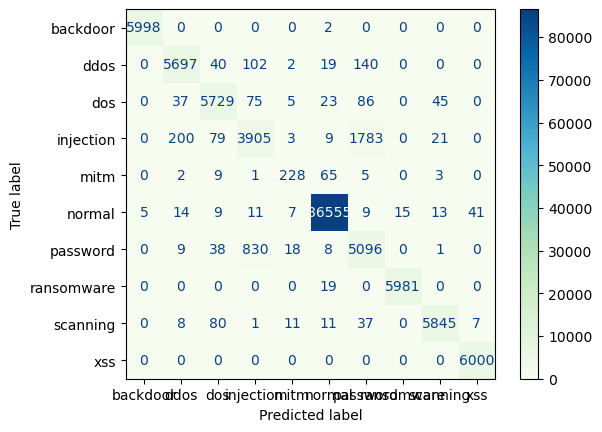

In [ ]:
from sklearn import metrics

# confusion matrix
confusion_matrix = metrics.plot_confusion_matrix(lr, X_test, y_test, cmap = "GnBu")
print(confusion_matrix)

# accuracy
print(classification_report(y_test, y_pred))

<AxesSubplot:>

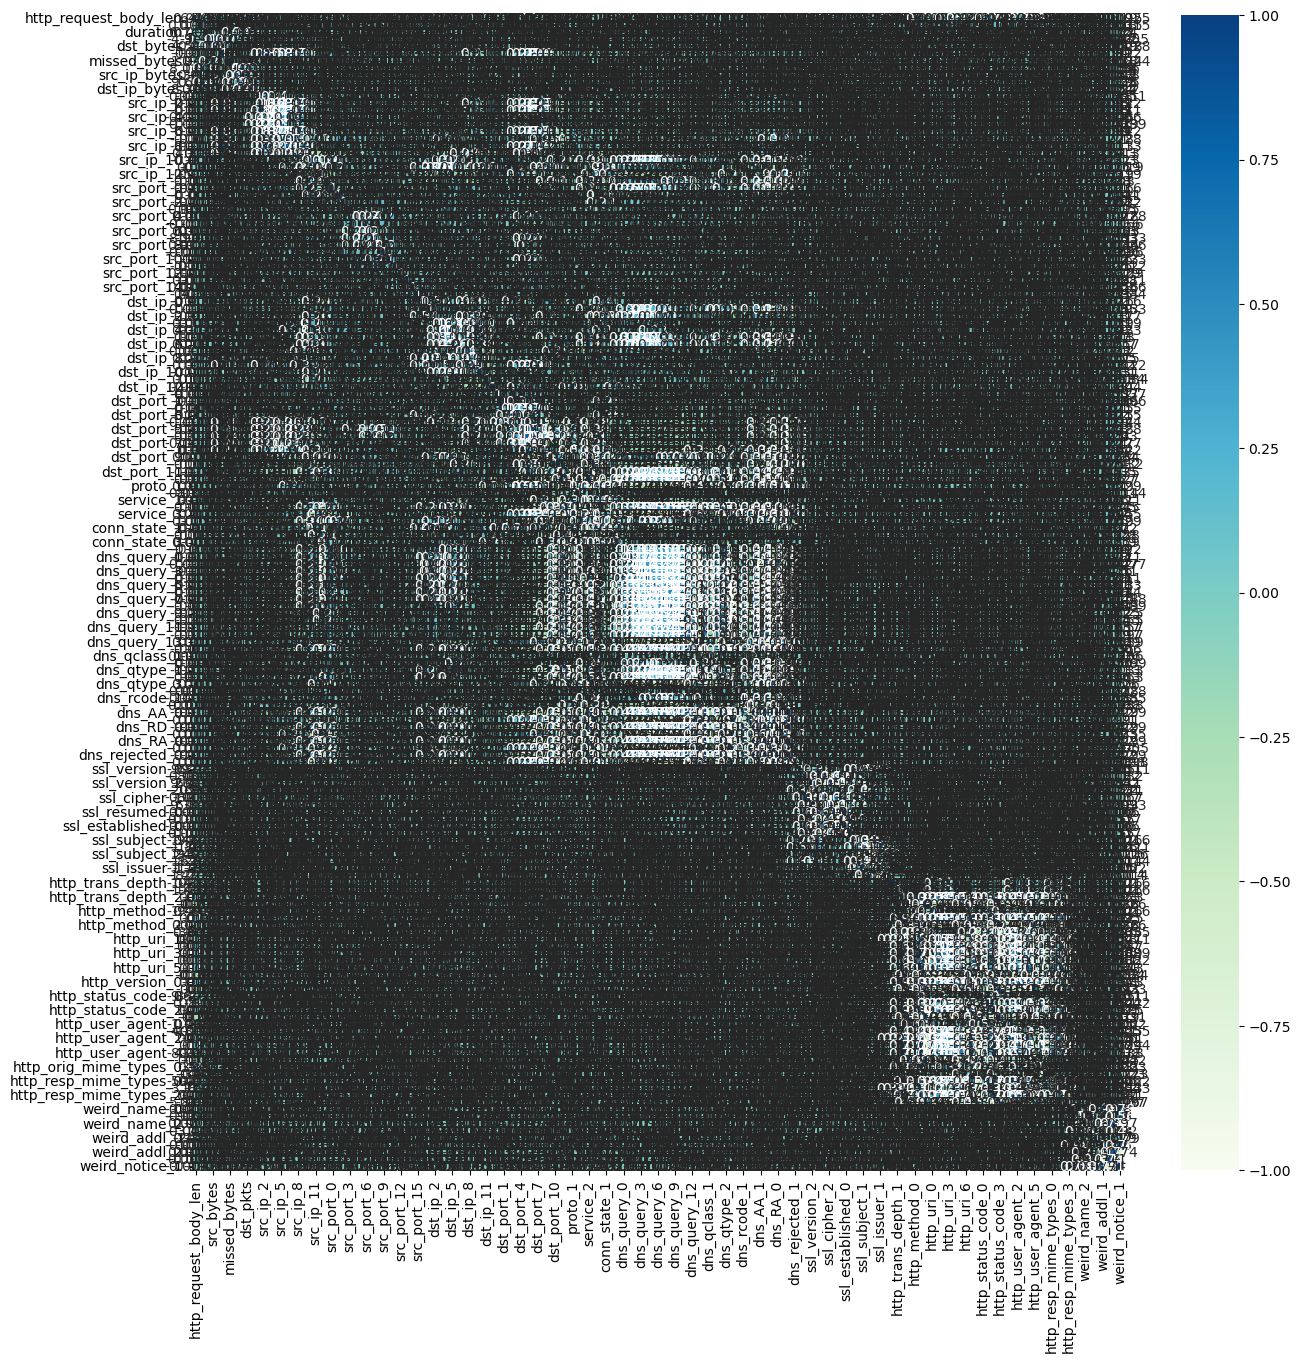

['http_request_body_len',
 'http_response_body_len',
 'duration',
 'src_bytes',
 'dst_bytes',
 'src_ip_0',
 'missed_bytes',
 'src_pkts',
 'src_ip_bytes',
 'dst_pkts',
 'dst_ip_bytes',
 'src_ip_1',
 'src_ip_2',
 'src_ip_3',
 'src_ip_4',
 'src_ip_5',
 'src_ip_6',
 'src_ip_7',
 'src_ip_8',
 'src_ip_9',
 'src_ip_10',
 'src_ip_11',
 'src_ip_12',
 'src_ip_13',
 'src_port_0',
 'src_port_1',
 'src_port_2',
 'src_port_3',
 'src_port_4',
 'src_port_5',
 'src_port_6',
 'src_port_7',
 'src_port_8',
 'src_port_9',
 'src_port_10',
 'src_port_11',
 'src_port_12',
 'src_port_13',
 'src_port_14',
 'src_port_15',
 'dst_ip_0',
 'dst_ip_1',
 'dst_ip_2',
 'dst_ip_3',
 'dst_ip_4',
 'dst_ip_5',
 'dst_ip_6',
 'dst_ip_7',
 'dst_ip_8',
 'dst_ip_9',
 'dst_ip_10',
 'dst_ip_11',
 'dst_ip_12',
 'dst_port_0',
 'dst_port_1',
 'dst_port_2',
 'dst_port_3',
 'dst_port_4',
 'dst_port_5',
 'dst_port_6',
 'dst_port_7',
 'dst_port_8',
 'dst_port_9',
 'dst_port_10',
 'dst_port_11',
 'proto_0',
 'proto_1',
 'service_0',
 'ser

In [ ]:
# select and rearrange columns
df = df[['src_ip_0',
 'src_ip_1',
 'src_ip_2',
 'src_ip_3',
 'src_ip_4',
 'src_ip_5',
 'src_ip_6',
 'src_ip_7',
 'src_ip_8',
 'src_ip_9',
 'src_ip_10',
 'src_ip_11',
 'src_ip_12',
 'src_ip_13',
 'src_port_0',
 'src_port_1',
 'src_port_2',
 'src_port_3',
 'src_port_4',
 'src_port_5',
 'src_port_6',
 'src_port_7',
 'src_port_8',
 'src_port_9',
 'src_port_10',
 'src_port_11',
 'src_port_12',
 'src_port_13',
 'src_port_14',
 'src_port_15',
 'dst_ip_0',
 'dst_ip_1',
 'dst_ip_2',
 'dst_ip_3',
 'dst_ip_4',
 'dst_ip_5',
 'dst_ip_6',
 'dst_ip_7',
 'dst_ip_8',
 'dst_ip_9',
 'dst_ip_10',
 'dst_ip_11',
 'dst_ip_12',
 'dst_port_0',
 'dst_port_1',
 'dst_port_2',
 'dst_port_3',
 'dst_port_4',
 'dst_port_5',
 'dst_port_6',
 'dst_port_7',
 'dst_port_8',
 'dst_port_9',
 'dst_port_10',
 'dst_port_11',
 'duration',
 'src_bytes',
 'dst_bytes',
 'missed_bytes',
 'src_pkts',
 'src_ip_bytes',
 'dst_pkts',
 'dst_ip_bytes',
 'dns_query_0',
 'dns_query_1',
 'dns_query_2',
 'dns_query_3',
 'dns_query_4',
 'dns_query_5',
 'dns_query_6',
 'dns_query_7',
 'dns_query_8',
 'dns_query_9',
 'dns_query_10',
 'dns_query_11',
 'dns_query_12',
 'dns_query_13',
 'http_request_body_len',
 'http_response_body_len',
 'proto_icmp',
 'proto_tcp',
 'proto_udp',
 'service_-',
 'service_dce_rpc',
 'service_dhcp',
 'service_dns',
 'service_ftp',
 'service_gssapi',
 'service_http',
 'service_smb',
 'service_smb;gssapi',
 'service_ssl',
 'conn_state_OTH',
 'conn_state_REJ',
 'conn_state_RSTO',
 'conn_state_RSTOS0',
 'conn_state_RSTR',
 'conn_state_RSTRH',
 'conn_state_S0',
 'conn_state_S1',
 'conn_state_S2',
 'conn_state_S3',
 'conn_state_SF',
 'conn_state_SH',
 'conn_state_SHR',
 'dns_qclass_0',
 'dns_qclass_1',
 'dns_qclass_32769',
 'dns_rejected_-',
 'dns_rejected_F',
 'dns_rejected_T',
 'dns_RA_-',
 'dns_RA_F',
 'dns_RA_T',
 'dns_RD_-',
 'dns_RD_F',
 'dns_RD_T',
 'dns_AA_-',
 'dns_AA_F',
 'dns_AA_T',
 'dns_rcode_0',
 'dns_rcode_1',
 'dns_rcode_2',
 'dns_rcode_3',
 'dns_rcode_5',
 'dns_qtype_0',
 'dns_qtype_1',
 'dns_qtype_2',
 'dns_qtype_6',
 'dns_qtype_12',
 'dns_qtype_16',
 'dns_qtype_28',
 'dns_qtype_32',
 'dns_qtype_33',
 'dns_qtype_43',
 'dns_qtype_48',
 'dns_qtype_255',
 'ssl_version_-',
 'ssl_version_TLSv10',
 'ssl_version_TLSv12',
 'ssl_version_TLSv13',
 'ssl_cipher_-',
 'ssl_cipher_TLS_AES_128_GCM_SHA256',
 'ssl_cipher_TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256',
 'ssl_cipher_TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256',
 'ssl_cipher_TLS_ECDHE_RSA_WITH_AES_256_CBC_SHA',
 'ssl_cipher_TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384',
 'ssl_resumed_-',
 'ssl_resumed_F',
 'ssl_resumed_T',
 'ssl_established_-',
 'ssl_established_F',
 'ssl_established_T',
 'ssl_subject_-',
 'ssl_subject_CN=*.events.data.microsoft.com;OU=Microsoft;O=Microsoft Corporation;L=Redmond;ST=WA;C=US',
 'ssl_subject_CN=*.wns.windows.com',
 'ssl_subject_CN=Mr Shepherd;OU=Security Shepherd Project;O=OWASP;L=Dublin;ST=Ireland;C=IE',
 'ssl_subject_CN=settings-win.data.microsoft.com;OU=WSE;O=Microsoft;L=Redmond;ST=WA;C=US',
 'ssl_subject_CN=sls.update.microsoft.com;OU=DSP;O=Microsoft;L=Redmond;ST=WA;C=US',
 'ssl_issuer_-',
 'ssl_issuer_CN=Microsoft IT TLS CA 5;OU=Microsoft IT;O=Microsoft Corporation;L=Redmond;ST=Washington;C=US',
 'ssl_issuer_CN=Microsoft Secure Server CA 2011;O=Microsoft Corporation;L=Redmond;ST=Washington;C=US',
 'ssl_issuer_CN=Microsoft Update Secure Server CA 2.1;O=Microsoft Corporation;L=Redmond;ST=Washington;C=US',
 'ssl_issuer_CN=Mr Shepherd;OU=Security Shepherd Project;O=OWASP;L=Dublin;ST=Ireland;C=IE',
 'weird_name_-',
 'weird_name_DNS_RR_unknown_type',
 'weird_name_TCP_ack_underflow_or_misorder',
 'weird_name_above_hole_data_without_any_acks',
 'weird_name_active_connection_reuse',
 'weird_name_bad_TCP_checksum',
 'weird_name_bad_UDP_checksum',
 'weird_name_connection_originator_SYN_ack',
 'weird_name_data_before_established',
 'weird_name_dnp3_corrupt_header_checksum',
 'weird_name_inappropriate_FIN',
 'weird_name_possible_split_routing',
 'weird_addl_-',
 'weird_addl_43',
 'weird_addl_46',
 'weird_addl_48',
 'weird_notice_-',
 'weird_notice_F',
 'http_trans_depth_-',
 'http_trans_depth_1',
 'http_trans_depth_10',
 'http_trans_depth_2',
 'http_trans_depth_3',
 'http_trans_depth_4',
 'http_trans_depth_5',
 'http_trans_depth_6',
 'http_trans_depth_7',
 'http_trans_depth_8',
 'http_trans_depth_9',
 'http_method_-',
 'http_method_GET',
 'http_method_HEAD',
 'http_method_POST',
 'http_uri_-',
 'http_uri_/',
 'http_uri_/37;51;99;37;54;53;37;54;100;37;54;50;37;54;53;37;54;52;37;50;48;37;55;51;37;55;50;37;54;51;37;51;100;37;50;50;37;51;52;37;54;52;37;54;52;37;51;53;37;51;49;37;54;52;37;51;55;37;54;50;37;51;50;37;54;51;37;51;51;37;51;53;37;51;51;37;51;57;37;54;54;37;54;52;37;51;55;37;51;53;37;51;49;37;51;49;37;54;49;37;51;54;37;51;50;37;51;51;37;51;49;37;51;48;37;54;51;37;54;53;37;51;48;37;54;54;37;51;55;37;51;51;37;50;50;37;51;101',
 'http_uri_/37;51;99;37;55;51;37;54;51;37;55;50;37;54;57;37;55;48;37;55;52;37;50;48;37;55;51;37;55;50;37;54;51;37;51;100;37;51;49;37;50;48;37;54;56;37;55;50;37;54;53;37;54;54;37;51;100;37;51;49;37;50;48;37;54;102;37;54;101;37;54;53;37;55;50;37;55;50;37;54;102;37;55;50;37;51;100;37;50;50;37;54;97;37;54;49;37;55;54;37;54;49;37;55;51;37;54;51;37;55;50;37;54;57;37;55;48;37;55;52;37;51;97;37;51;53;37;51;48;37;51;57;37;51;55;37;51;57;37;51;57;37;51;48;37;51;50;37;54;52;37;54;53;37;51;55;37;54;50;37;51;48;37;51;54;37;51;51;37;54;49;37;51;56;37;51;55;37;54;51;37;51;51;37;51;53;37;51;54;37;51;48;37;51;50;37;51;51;37;54;52;37;51;57;37;54;53;37;51;56;37;51;54;37;54;50;37;54;52;37;50;50;37;51;101;37;51;99;37;50;102;37;55;51;37;54;51;37;55;50;37;54;57;37;55;48;37;55;52;37;51;101',
 'http_uri_/?C=D;O=A',
 'http_uri_/?C=D;O=D',
 'http_uri_/?C=M;O=D',
 'http_uri_/?C=N;O=A',
 'http_uri_/?C=S;O=A',
 'http_uri_/?C=S;O=D',
 "http_uri_/?id=3') UNION ALL SELECT NULL;NULL;NULL;NULL;NULL;NULL;NULL;NULL-- uzzZ",
 "http_uri_/?id=3');SELECT PG_SLEEP(5)--",
 'http_uri_/AVTransport_1.xml',
 'http_uri_/ConnectionManager_1.xml',
 'http_uri_/MFEwTzBNMEswSTAJBgUrDgMCGgUABBTBL0V27RVZ7LBduom/nYB45SPUEwQU5Z1ZMIJHWMys+ghUNoZ7OrUETfACEA8sEMlbBsCTf7jUSfg+hWk=',
 'http_uri_/RenderingControl_1.xml',
 'http_uri_/c/msdownload/update/others/2019/04/28698818_bfacd682bfb9bf10a7396fb5e080fa0a38d1b153.cab',
 'http_uri_/c/msdownload/update/others/2019/04/28698935_cba82db85983dbc8b69d1f5871c20aaaddd5cf1a.cab',
 'http_uri_/c/msdownload/update/others/2019/04/28699347_4732b1ab470d51de66dee45e4114cb6174f55279.cab',
 'http_uri_/c/msdownload/update/others/2019/04/28699464_f160590bb263a9a1eec87a91553216013f276682.cab',
 'http_uri_/c/msdownload/update/others/2019/04/28700335_30bfc4d04ec3c1563df1800974a7c7248a8ef680.cab',
 'http_uri_/c/msdownload/update/others/2019/04/28700452_4cbc02e8e632e8e591c8cf02d8f72821c8171c8e.cab',
 'http_uri_/c/msdownload/update/software/defu/2019/04/am_delta_patch_1.291.983.0_42d244ea61ea1b0659763a8a411f7e50829b18a8.exe',
 'http_uri_/c/msdownload/update/software/secu/2019/02/windows10.0-kb4483452-x64_f58d9b9ff95e2b686c4bc7666dbc45aadd151b0c.cab',
 'http_uri_/c/msdownload/update/software/secu/2019/03/windows10.0-kb4489907-x64_81a7b15b9c65e416e071d15bb9334c7458d70011.cab',
 'http_uri_/comms',
 'http_uri_/connecttest.txt',
 'http_uri_/d/msdownload/update/others/2019/04/28699861_9488bae666d9f85a1316793f9e52a14994eae7e5.cab',
 'http_uri_/d/msdownload/update/others/2019/04/28699978_267ce87ae387c89ad48620a61d803f590850a51e.cab',
 'http_uri_/d/msdownload/update/others/2019/04/28700929_b0858c8cc4f87bf50282ebd25dbbd2dc82664c0c.cab',
 'http_uri_/d/msdownload/update/others/2019/04/28701422_19fc1c232bf7eb4d3ddd097afebcaa3a0479d76c.cab',
 'http_uri_/d/msdownload/update/others/2019/04/28702816_586ec5981a557b2f52707c80339980bbda1d24f6.cab',
 'http_uri_/d/msdownload/update/software/defu/2019/02/updateplatform_23725566d66a26c81fbfaf79701b727f92a650ea.exe',
 'http_uri_/d/msdownload/update/software/defu/2019/04/am_delta_1e7c6825ff06eeddf3f92482523533378a79057f.exe',
 'http_uri_/d/msdownload/update/software/updt/2018/10/windows10.0-kb4462930-x64_d52b4bff2c86e2ffc0b40b2dce6b720836e1b646.cab',
 'http_uri_/dmr',
 'http_uri_/dms/metadata.svc',
 'http_uri_/dvwa/',
 'http_uri_/dvwa/login.php',
 'http_uri_/dvwa/login.php-r',
 'http_uri_/dvwa/vulnerabilities/sqli/',
 'http_uri_/emdl/d/dod/ph/prod6/msdownload/update/software/defu/2019/02/1024/updateplatform_23725566d66a26c81fbfaf79701b727f92a650ea.exe.json',
 'http_uri_/en-US/livetile/preinstall?region=US&appid=C98EA5B0842DBB9405BBF071E1DA76512D21FE36&FORM=Threshold',
 'http_uri_/filestreamingservice/files/0791715e-2de4-47f2-ba02-d980d28e51c3/pieceshash',
 'http_uri_/filestreamingservice/files/0791715e-2de4-47f2-ba02-d980d28e51c3?P1=1554310793&P2=402&P3=2&P4=OpT40J12u6vnE3wqEWZys2198U3ldmYlyhpWrk2/97kYtZmIE1+2vtQ/7kYGMaPI5urUAJ7NZiZNtiNktgPvaA==',
 'http_uri_/filestreamingservice/files/1f41d40e-6e49-42f0-a4dc-3d35029e2a5d/pieceshash',
 'http_uri_/filestreamingservice/files/1f41d40e-6e49-42f0-a4dc-3d35029e2a5d?P1=1554315773&P2=402&P3=2&P4=D2MtshBIyXICLz+f8ls5Sa4mWcxA1B670oj1WRainhnd91v77n9XO6/xoc4QeEYZdwdKSG+6cFNvkBVYbJdXpw==',
 'http_uri_/filestreamingservice/files/846ab63f-c24f-4c71-bc98-6d8fa3f5e5d7/pieceshash',
 'http_uri_/filestreamingservice/files/846ab63f-c24f-4c71-bc98-6d8fa3f5e5d7?P1=1554310453&P2=402&P3=2&P4=l0mwXDvb5/y2rqu/g6TNhETQLS++OvWqWkMXYMSnMuqiHgfVXg9rPHQAr/I7U+Oo5I++LRwjHuFY5S5SbIij1g==',
 'http_uri_/fwlink/?LinkID=252669&clcid=0x409',
 'http_uri_/icon_LRG.jpg',
 'http_uri_/icon_LRG.png',
 'http_uri_/icon_SML.jpg',
 'http_uri_/icon_SML.png',
 'http_uri_/manual',
 'http_uri_/manual/da/index.html',
 'http_uri_/manual/zh-cn/index.html',
 'http_uri_/msdownload/update/v3/static/trustedr/en/disallowedcertstl.cab?e793f3590addb8f9',
 'http_uri_/msdownload/update/v3/static/trustedr/en/pinrulesstl.cab?9fd0fd9b8b472c10',
 'http_uri_/msdownload/update/v3/static/trustedr/en/pinrulesstl.cab?b3d98506e52475df',
 'http_uri_/no_nonce_string/',
 'http_uri_/no_nonce_string/ContentDirectory/scpd.xml',
 'http_uri_/nservice/',
 'http_uri_/ozblX3bYcm/wps_device.xml',
 'http_uri_/prod/9/9842fdea-4798-4143-b181-565964f5d454.devicemetadata-ms',
 'http_uri_/success.txt',
 'http_uri_/ubuntu/dists/cosmic-security/InRelease',
 'http_uri_/ubuntu/dists/cosmic-updates/InRelease',
 'http_uri_/ubuntu/dists/cosmic/InRelease',
 'http_uri_/ubuntu/pool/main/l/linux/linux-modules-4.18.0-17-generic_4.18.0-17.18_amd64.deb',
 'http_uri_/upnp/control/ConnectionManager1',
 'http_uri_/webmail/',
 'http_uri_/webmail/src/login.php',
 'http_uri_/webupd8team/java/ubuntu/dists/bionic/InRelease',
 'http_version_-',
 'http_version_1.1',
 'http_resp_mime_types_-',
 'http_resp_mime_types_application/ocsp-response',
 'http_resp_mime_types_application/vnd.ms-cab-compressed',
 'http_resp_mime_types_application/x-debian-package',
 'http_resp_mime_types_application/xml',
 'http_resp_mime_types_image/jpeg',
 'http_resp_mime_types_image/png',
 'http_resp_mime_types_text/html',
 'http_resp_mime_types_text/json',
 'http_resp_mime_types_text/plain',
 'http_orig_mime_types_-',
 'http_orig_mime_types_application/soap+xml',
 'http_orig_mime_types_application/xml',
 'http_user_agent_-',
 'http_user_agent_Comos/0.9_(robot@xyleme.com)',
 'http_user_agent_DAFUPnP',
 'http_user_agent_DataCha0s/2.0',
 'http_user_agent_Debian APT-HTTP/1.3 (1.6.6)',
 'http_user_agent_Debian APT-HTTP/1.3 (1.7.4)',
 'http_user_agent_DonutP; Windows98SE',
 'http_user_agent_MICROSOFT_DEVICE_METADATA_RETRIEVAL_CLIENT',
 'http_user_agent_Microsoft BITS/7.8',
 'http_user_agent_Microsoft NCSI',
 'http_user_agent_Microsoft-CryptoAPI/10.0',
 'http_user_agent_Microsoft-Delivery-Optimization/10.0',
 'http_user_agent_Microsoft-WNS/10.0',
 'http_user_agent_Microsoft-Windows/10.0 UPnP/1.0',
 'http_user_agent_Microsoft-Windows/10.0 UPnP/1.0 Microsoft-DLNA DLNADOC/1.50',
 'http_user_agent_Mozilla/1.22 (compatible; MSIE 10.0; Windows 3.1)',
 'http_user_agent_Mozilla/4.08 [en] (WinNT; I ;Nav)',
 'http_user_agent_Mozilla/5.0 (Macintosh; Intel Mac OS X 10.11; rv:49.0) Gecko/20100101 Firefox/49.0',
 'http_user_agent_Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_0) AppleWebKit/537.36 (KHTML; like Gecko) Chrome/53.0.2785.143 Safari/537.36',
 'http_user_agent_Mozilla/5.0 (SMART-TV; Linux; Tizen 2.3) AppleWebkit/538.1 (KHTML; like Gecko) SamsungBrowser/1.0 Safari/538.1',
 'http_user_agent_Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML; like Gecko) Chrome/64.0.3282.140 Safari/537.36 Edge/18.17763',
 'http_user_agent_Mozilla/5.0 (Windows NT 6.1; WOW64; rv:49.0) Gecko/20100101 Firefox/49.0',
 'http_user_agent_Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:5.0) Whistler/20110021 myibrow/5.0.0.0',
 'http_user_agent_Mozilla/5.0 (Windows NT 6.1; rv:21.0) Gecko/20130401 Firefox/21.0',
 'http_user_agent_Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML; like Gecko) Chrome/53.0.2785.143 Safari/537.36',
 'http_user_agent_Mozilla/5.0 (Windows NT 6.3; rv:36.0) Gecko/20100101 Firefox/36.0',
 'http_user_agent_Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/534.30 (KHTML; like Gecko) Version/4.0 Oupeng/10.2.1.86910 Safari/534.30',
 'http_user_agent_Mozilla/5.0 (X11; U; Linux i686; de-DE; rv:1.6) Gecko/20040207 Firefox/0.8',
 'http_user_agent_Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:66.0) Gecko/20100101 Firefox/66.0',
 'http_user_agent_Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; Trident/4.0; InfoPath.2; SV1; .NET CLR 2.0.50727; WOW64)',
 'http_user_agent_Mozilla/5.0 (iPhone; U; CPU iOS 2_0 like Mac OS X; en-us)',
 'http_user_agent_Ruby',
 'http_user_agent_User-Agent: Microsoft-DLNA DLNADOC/1.50',
 'http_user_agent_Windows-Update-Agent/10.0.10011.16384 Client-Protocol/1.91',
 'http_user_agent_hacking',
 'http_user_agent_sqlmap/1.2#stable (http://sqlmap.org)',
 'http_status_code_0',
 'http_status_code_101',
 'http_status_code_200',
 'http_status_code_206',
 'http_status_code_302',
 'http_status_code_304',
 'http_status_code_403',
 'http_status_code_404','label']

SyntaxError: unexpected EOF while parsing (148304024.py, line 331)

In [ ]:
df

In [ ]:
### 3. Model Building  ###

# split dataset
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df.iloc[:,:-1]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# implement logistic regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter = 300)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [ ]:
### 4. Model Evaluation  ###
from sklearn import metrics

# confusion matrix
confusion_matrix = metrics.plot_confusion_matrix(reg, X_test, y_test, cmap = "GnBu")
print(confusion_matrix)

# accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))





In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

In [ ]:
# recall
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

In [ ]:
# precision
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)